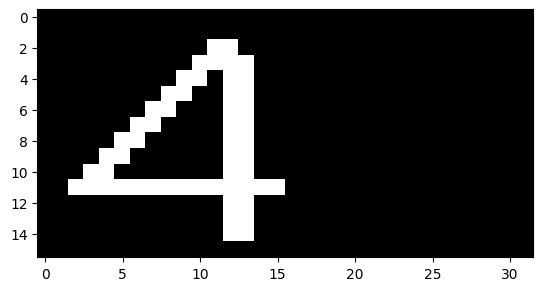

In [37]:
# Mirroring
import torch
import matplotlib.pyplot as plt
from src.data.numberReps import NumberReps 
import random
# for i in range(10):
#     fig, ax = plt.subplots()
#     input=NumberReps.number_to_rep[i]
#     ax.imshow(input.numpy(), interpolation='nearest', cmap='gray')



def generate_numbers():
    return  NumberReps.number_to_rep[random.randint(0,9)]
num_samples=2
latents = torch.randint(0, 9, (num_samples,2))
def latents_to_inputs(latents):
    samples = torch.zeros((0,16,32))
    for i in range(latents.size(0)):
        left = NumberReps.number_to_rep[int(latents[i,0])]
        right = NumberReps.number_to_rep[int(latents[i,1])]
        next_sample=torch.concat((left, right), axis=1).unsqueeze(0)
        samples=torch.concat((samples, next_sample),axis=0)
    return samples

def latents_to_targets(latents):
    samples = torch.zeros((0,16,32))
    for i in range(latents.size(0)):
        num = latents[i,0] + latents[i,1]
        mod_num = int(num%10)
        left = NumberReps.number_to_rep[mod_num]
        right = torch.zeros_like(left)
        next_sample=torch.concat((left, right), axis=1).unsqueeze(0)
        samples=torch.concat((samples, next_sample),axis=0)
    return samples


inputs = latents_to_inputs(latents)
targets = latents_to_targets(latents)



plt.imshow(inputs[0], interpolation='nearest', cmap='gray')
plt.imshow(targets[0], interpolation='nearest', cmap='gray')
# inputs = 
#latent is shape (num_samples, 2)
#input is shape (num_samples, self.width, self.height))
# plt.imshow(generate_numbers(), interpolation='nearest', cmap='gray')

# input = torch.tensor([[1, 0, 1], [1, 0, 1], [1, 1, 0]])
# output = torch.flip(input, [1])
# plt.colorbar()
# plt.show()
# plt.imshow(output.numpy(), interpolation='nearest', cmap='gray')
# plt.colorbar()
# plt.show()

In [2]:
from src.data.toy_datamodule import ToyDataModule

horizontal_flip = lambda x: torch.flip(x, [2])
data = ToyDataModule(target_fn=horizontal_flip)
data.setup('fit')

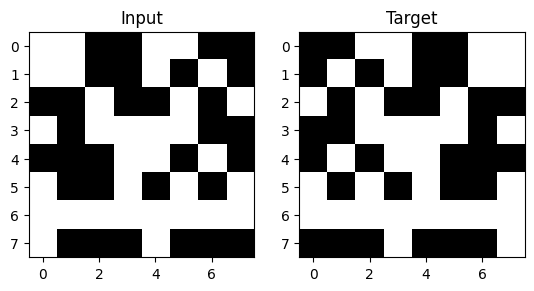

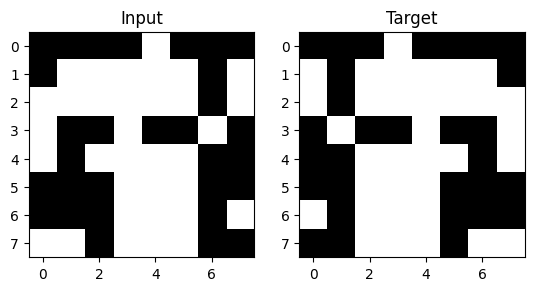

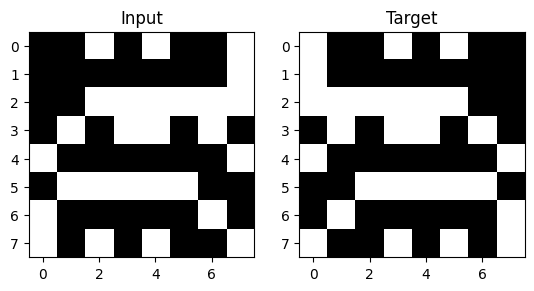

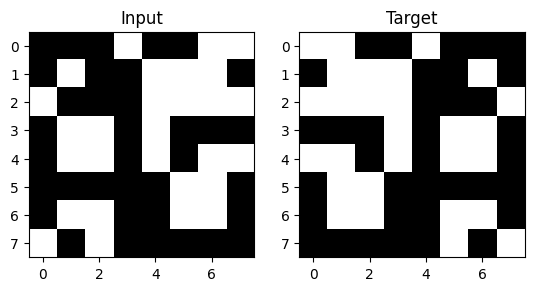

In [6]:
for index, (input, target) in enumerate(data.train_dataloader()): 
    plt.subplot(1, 2, 1)
    plt.imshow(input[0].numpy(), interpolation='nearest', cmap='gray')
    plt.title('Input')
    plt.subplot(1, 2, 2)
    plt.imshow(target[0].numpy(), interpolation='nearest', cmap='gray')
    plt.title('Target')
    plt.show()
    
    if index == 3:
        break